In [40]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.interpolate import interp1d

plt.style.use('vyason')

In [41]:
def gauss(x,sig):
    return np.exp(-x**2/sig**2)

In [42]:
xlim = 2

x2_cent = xlim/2
x1_cent = -x2_cent

sig = 0.25
dx = sig/100

gap = xlim/10

x = np.arange(-xlim,xlim+dx,dx)
x1 = np.arange(-xlim+gap,0+dx-gap,dx)
x2 = np.arange(0+gap,xlim+dx-gap,dx)

gaussian_1 = gauss(x1-x1_cent,sig)
gaussian_2 = gauss(x2-x2_cent,sig)
gaussian_1_int = interp1d(x1,gaussian_1,kind='linear')
gaussian_2_int = interp1d(x2,gaussian_2,kind='linear')

####################################################
fig,ax = plt.subplots(1,1,constrained_layout=True)

ax.plot(x1,gaussian_1,c='red',lw=1.5)
ax.plot(x2,gaussian_2,c='blue',lw=1.5)

ax.axis('off')

ymax = 1.25*np.max(gaussian_1)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(0,ymax)

fig.savefig('GenerateCorrelations_1.pdf')



####################################################
markings = sig * np.array( [-1.5,-0.75,0,0.75,1.50], float)
disps = sig* np.array( [2.00,1.50,1.25,1.00,0.50], float)
pos1 = x1_cent - markings
pos2 = x2_cent + markings
disp1 = disps
disp2 = -disps

for i in range(len(markings)):
    ax.arrow(pos1[i],gaussian_1_int(pos1[i]),disp1[i],0,head_width=sig/10, head_length=sig/10, lw=0.5, color='red')
    ax.arrow(pos2[i],gaussian_2_int(pos2[i]),disp2[i],0,head_width=sig/10, head_length=sig/10, lw=0.5, color='blue')

############################################
####################################################
pos1 = x1_cent + 1.25*sig
pos2 = x2_cent - 1.25*sig


fig.savefig('GenerateCorrelations_2.pdf')

TypeError: 'float' object is not subscriptable

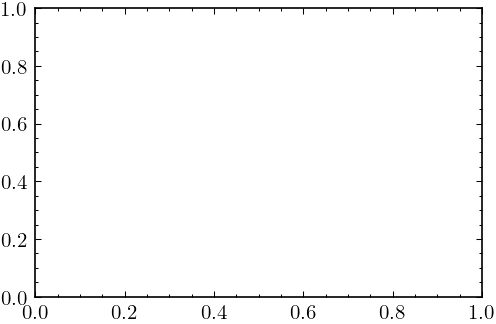

In [43]:
fig,ax = plt.subplots(1,1,constrained_layout=True,dpi=150)

ax.plot(x1,gaussian_1,c='red',ls='--',lw=1)
ax.plot(x2,gaussian_2,c='blue',ls='--',lw=1)

ax.axis('off')

####################################################
J = len(markings)
ax.arrow(pos1[J-1],gaussian_1_int(pos1[J-1]),disp1[J-1],0,head_width=sig/10, head_length=sig/10, lw=0.5, color='red')
ax.arrow(pos2[J-1],gaussian_2_int(pos2[J-1]),disp2[J-1],0,head_width=sig/10, head_length=sig/10, lw=0.5, color='blue')
ax.scatter(pos2[J-1],gaussian_2_int(pos2[J-1]),zorder=99,c='black',s=10)
ax.axvline(pos1,c='red')
ax.axvline(pos2,c='blue')

ymax = 1.25*np.max(gaussian_1)
ax.set_xlim(-xlim,xlim)
ax.set_ylim(0,ymax)

#fig.savefig('GenerateCorrelations_4.pdf')


ax.set_ylim(0,ymax)

fig.savefig('GenerateCorrelations_3.pdf')


Text(0.5, 1.0, "$V = r^3 \\implies V'' = r$")

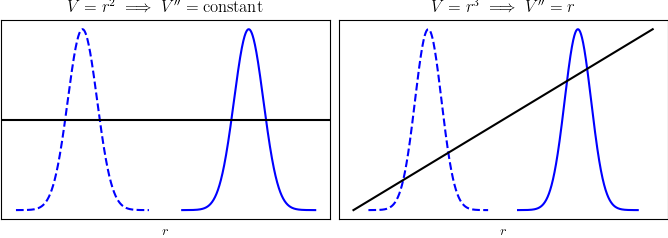

In [ ]:
fig,ax = plt.subplots(1,2,constrained_layout=True)
def_width,def_height = plt.rcParams["figure.figsize"]
fig.set_size_inches(2*def_width,1.1*def_height)

for i in range(2):
    ax[i].plot(x1,gaussian_1,c='blue',ls='--')
    ax[i].plot(x2,gaussian_2,c='blue')

    ax[i].set_xticks([])
    ax[i].set_yticks([])

    ax[i].set_xlabel(r"$r$")

ax[0].axhline(ymax/2.5,c='black')
ax[1].plot(x,((x+xlim)/xlim)*ymax/2.5,c='black')

ax[0].set_title(r"$V = r^2 \implies V'' = \text{constant}$")
ax[1].set_title(r"$V = r^3 \implies V'' = r$")


#fig.savefig('ForceGradients.pdf')

In [ ]:
fig,ax = plt.subplots(1,1,constrained_layout=True)

ax.plot(x2,gaussian_2,c='blue')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

####################################################
pos2 = x2_cent - 0.5*sig
ax.scatter(pos2,gaussian_2_int(pos2),zorder=99,c='black',s=10)
ax.arrow(pos2,gaussian_2_int(pos2),-2*sig,0,head_width=sig/10, head_length=sig/10)

ymax = 1.25*np.max(gaussian_1)
ax.set_xlim(0,xlim)
ax.set_ylim(0,ymax)

pos2_A = x2_cent - sig
pos2_B = x2_cent
pos2_C = x2_cent + 1.75*sig 
pos2_D = x2_cent + 0.75*sig 
ax.scatter(pos2_A,gaussian_2_int(pos2_A),zorder=99,c='black',s=10)
ax.scatter(pos2_B,gaussian_2_int(pos2_B),zorder=99,c='black',s=10)
ax.scatter(pos2_C,gaussian_2_int(pos2_C),zorder=99,c='black',s=10)
ax.scatter(pos2_D,gaussian_2_int(pos2_D),zorder=99,c='black',s=10)
ax.arrow(pos2_A,gaussian_2_int(pos2_A),-2.5*sig,0,head_width=sig/10, head_length=sig/10)
ax.arrow(pos2_B,gaussian_2_int(pos2_B),-1.25*sig,0,head_width=sig/10, head_length=sig/10)
ax.arrow(pos2_C,gaussian_2_int(pos2_C),-0.25*sig,0,head_width=sig/10, head_length=sig/10)
ax.arrow(pos2_D,gaussian_2_int(pos2_D),-0.5*sig,0,head_width=sig/10, head_length=sig/10)

ax.annotate(r'$|\psi(r)|^2$',(x2_cent+0.5*sig,0.9*ymax),c='blue',fontsize=12)

ax.set_ylabel(r'$|\psi(r)|^2$')
ax.set_xlabel(r'$r$')

#fig.savefig('ForceGradient_RM.pdf')


Text(0.5, 0, '$r$')